In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Training_Data_Set.csv')
df

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,NaN,NaN,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4.0,4.0,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4.0,5.0,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4.0,5.0,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4.0,5.0,diesel,3085561.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53510,78511,skoda,octavia,Delhi,29334.0,Fourth & Above,2014,5,1598,77.0,NaN,4,man,4.0,5.0,diesel,1342996.50
53511,78512,skoda,octavia,Bangalore,223631.0,Fourth & Above,2009,10,1900,77.0,NaN,8,man,5.0,5.0,diesel,510732.75
53512,78513,bmw,x1,Pune,25500.0,Third,2015,4,1995,105.0,NaN,4,auto,4.0,5.0,diesel,2008123.50
53513,78514,toyota,avensis,Jaipur,1195500.0,Third,2011,8,11950,93.0,compact,5,man,NaN,NaN,diesel,874352.25


In [3]:
df.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'body_type', 'Vroom Audit Rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type', 'Price'],
      dtype='object')

In [4]:
df.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
Distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count              7534
seat_count              8511
fuel_type                  0
Price                      0
dtype: int64

In [5]:
df.drop(columns=['body_type'],inplace=True)

In [6]:
df['Distance '].fillna(df['Distance '].median(),inplace=True)
df['engine_power'].fillna(df['engine_power'].median(),inplace=True)
df['door_count'].fillna(df['door_count'].mode()[0],inplace=True)
df['seat_count'].fillna(df['seat_count'].mean(),inplace=True)

In [7]:
df.dtypes

Id                       int64
Maker                   object
model                   object
Location                object
Distance               float64
Owner Type              object
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
Vroom Audit Rating       int64
transmission            object
door_count             float64
seat_count             float64
fuel_type               object
Price                  float64
dtype: object

In [8]:
df['Distance ']=df['Distance '].astype(int)
df['engine_power']=df['engine_power'].astype(int)
df['door_count']=df['door_count'].astype(int)
df['seat_count']=df['seat_count'].astype(int)
df['Price']=df['Price'].astype(int)

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
df['Maker']=le.fit_transform(df['Maker'])
df['model']=le.fit_transform(df['model'])
df['Location']=le.fit_transform(df['Location'])
df['Owner Type']=le.fit_transform(df['Owner Type'])
df['transmission']=le.fit_transform(df['transmission'])
df['fuel_type']=le.fit_transform(df['fuel_type'])

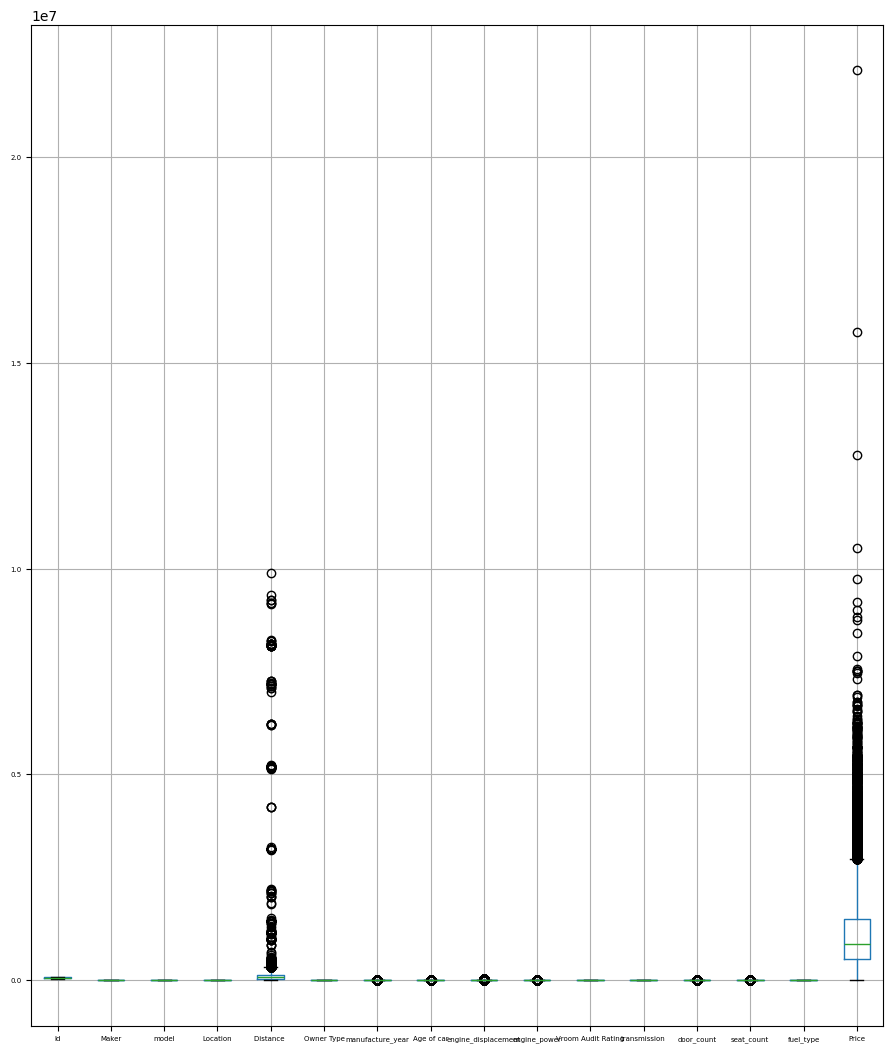

In [11]:
df.boxplot(fontsize=5,figsize=(11,13))
plt.show()

In [12]:
df1=df.copy()

In [13]:
q1=df.quantile(0.25)
q1

Id                      38379.5
Maker                       1.0
model                       8.0
Location                    2.0
Distance                16507.0
Owner Type                  0.0
manufacture_year         2008.0
Age of car                  5.0
engine_displacement      1395.0
engine_power               74.0
Vroom Audit Rating          5.0
transmission                0.0
door_count                  4.0
seat_count                  4.0
fuel_type                   0.0
Price                  505181.0
Name: 0.25, dtype: float64

In [14]:
q3=df.quantile(0.75)
q3

Id                       65136.5
Maker                        6.0
model                       16.0
Location                     8.0
Distance                133304.0
Owner Type                   3.0
manufacture_year          2014.0
Age of car                  11.0
engine_displacement       1995.0
engine_power               125.0
Vroom Audit Rating           7.0
transmission                 1.0
door_count                   4.0
seat_count                   5.0
fuel_type                    1.0
Price                  1477828.5
Name: 0.75, dtype: float64

In [15]:
iqr=q3-q1
iqr

Id                      26757.0
Maker                       5.0
model                       8.0
Location                    6.0
Distance               116797.0
Owner Type                  3.0
manufacture_year            6.0
Age of car                  6.0
engine_displacement       600.0
engine_power               51.0
Vroom Audit Rating          2.0
transmission                1.0
door_count                  0.0
seat_count                  1.0
fuel_type                   1.0
Price                  972647.5
dtype: float64

In [16]:
ll=q1-1.5*iqr
ll

Id                      -1756.00
Maker                      -6.50
model                      -4.00
Location                   -7.00
Distance              -158688.50
Owner Type                 -4.50
manufacture_year         1999.00
Age of car                 -4.00
engine_displacement       495.00
engine_power               -2.50
Vroom Audit Rating          2.00
transmission               -1.50
door_count                  4.00
seat_count                  2.50
fuel_type                  -1.50
Price                 -953790.25
dtype: float64

In [17]:
ul=q3+1.5*iqr
ul

Id                      105272.00
Maker                       13.50
model                       28.00
Location                    17.00
Distance                308499.50
Owner Type                   7.50
manufacture_year          2023.00
Age of car                  20.00
engine_displacement       2895.00
engine_power               201.50
Vroom Audit Rating          10.00
transmission                 2.50
door_count                   4.00
seat_count                   6.50
fuel_type                    2.50
Price                  2936799.75
dtype: float64

In [18]:
df_outlier=df[(df>ll)&(df<ul)]

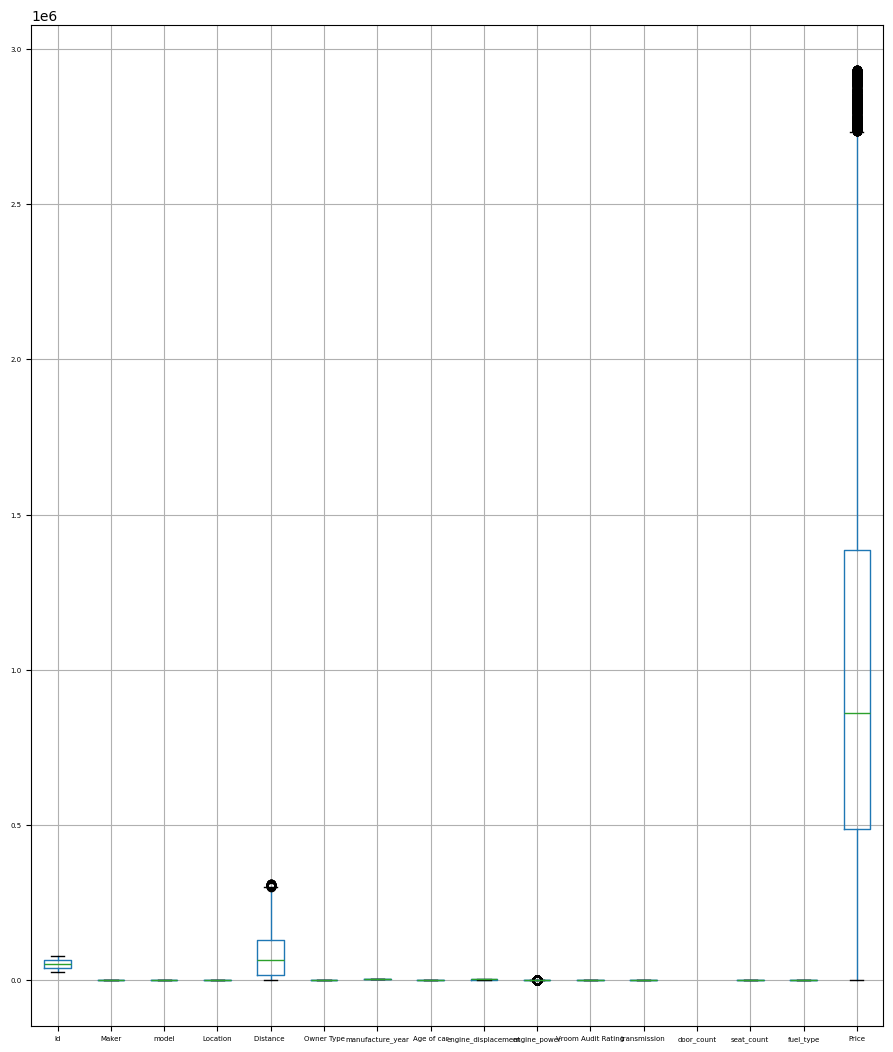

In [19]:
df_outlier.boxplot(fontsize=5,figsize=(11,13))
plt.show()

In [20]:
q1=df['Distance '].quantile(0.25)
q3=df['Distance '].quantile(0.75)
iqr=q3-q1
LL=q1-1.5*iqr
Ul=q3+1.5*iqr
df_outlier1=df[['Distance ']][(df['Distance ']>LL)&(df['Distance ']<Ul)]

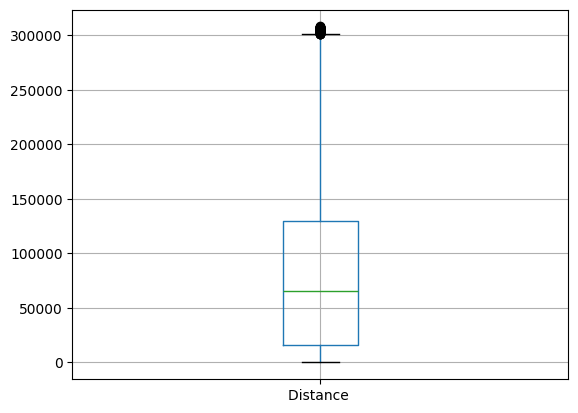

In [21]:
df_outlier1.boxplot()
plt.show()

In [22]:
q1=df_outlier1.quantile(0.25)
q3=df_outlier1.quantile(0.75)
iqr=q3-q1
LL=q1-1.5*iqr
Ul=q3+1.5*iqr
df_outlier2=df[['Distance ']][(df_outlier1>LL)&(df_outlier1<Ul)]

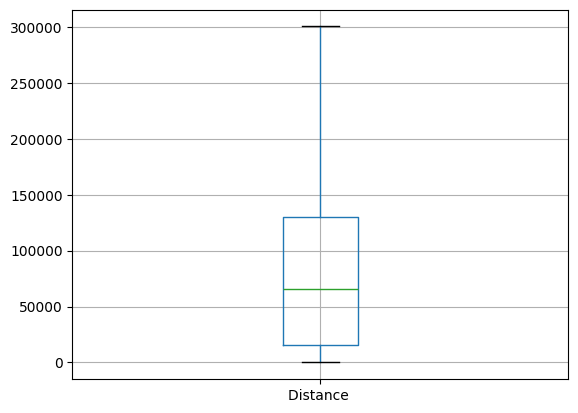

In [23]:
df_outlier2.boxplot()
plt.show()

In [24]:
q1=df['engine_power'].quantile(0.25)
q3=df['engine_power'].quantile(0.75)
iqr=q3-q1
LL=q1-1.5*iqr
Ul=q3+1.5*iqr
df_outlier3=df[['engine_power']][(df['engine_power']>LL)&(df['engine_power']<Ul)]

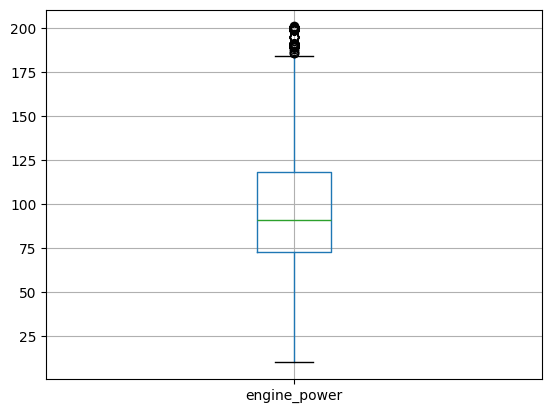

In [25]:
df_outlier3.boxplot()
plt.show()

In [26]:
q1=df_outlier3.quantile(0.25)
q3=df_outlier3.quantile(0.75)
iqr=q3-q1
LL=q1-1.5*iqr
Ul=q3+1.5*iqr
df_outlier4=df[['engine_power']][(df_outlier3>LL)&(df_outlier3<Ul)]

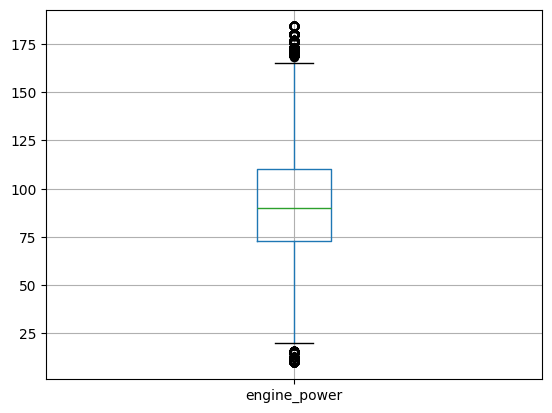

In [27]:
df_outlier4.boxplot()
plt.show()

In [28]:
q1=df_outlier4.quantile(0.25)
q3=df_outlier4.quantile(0.75)
iqr=q3-q1
LL=q1-1.5*iqr
Ul=q3+1.5*iqr
df_outlier5=df[['engine_power']][(df_outlier4>LL)&(df_outlier4<Ul)]

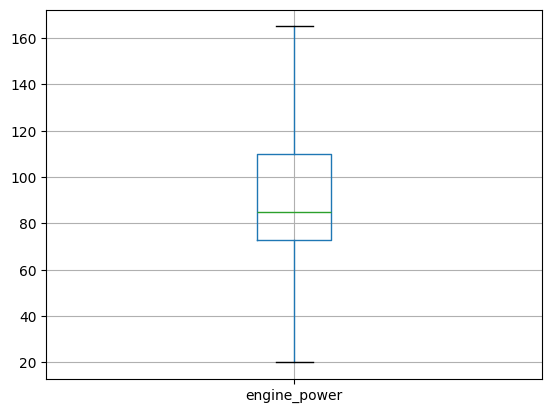

In [29]:
df_outlier5.boxplot()
plt.show()

In [30]:
Q1=df[['Price']].quantile(0.25)
Q1
Q3=df[['Price']].quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price=(df[['Price']][(df[['Price']]>LL)&(df[['Price']]<UL)])

In [31]:
Q1=df2_Price.quantile(0.25)
Q1
Q3=df2_Price.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price1=(df[['Price']][(df2_Price>LL)&(df2_Price<UL)])

In [32]:
Q1=df2_Price1.quantile(0.25)
Q1
Q3=df2_Price1.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price2=(df[['Price']][(df2_Price1>LL)&(df2_Price1<UL)])

In [33]:
Q1=df2_Price2.quantile(0.25)
Q1
Q3=df2_Price2.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price3=(df[['Price']][(df2_Price2>LL)&(df2_Price2<UL)])

In [34]:
Q1=df2_Price3.quantile(0.25)
Q1
Q3=df2_Price3.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price4=(df[['Price']][(df2_Price3>LL)&(df2_Price3<UL)])

In [35]:
Q1=df2_Price4.quantile(0.25)
Q1
Q3=df2_Price4.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price5=(df[['Price']][(df2_Price4>LL)&(df2_Price4<UL)])

In [36]:
Q1=df2_Price5.quantile(0.25)
Q1
Q3=df2_Price5.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price6=(df[['Price']][(df2_Price5>LL)&(df2_Price5<UL)])

In [37]:
Q1=df2_Price6.quantile(0.25)
Q1
Q3=df2_Price6.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price7=(df[['Price']][(df2_Price6>LL)&(df2_Price6<UL)])

In [38]:
Q1=df2_Price7.quantile(0.25)
Q1
Q3=df2_Price7.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price8=(df[['Price']][(df2_Price7>LL)&(df2_Price7<UL)])

In [39]:
del df_outlier['door_count']

In [40]:
del df_outlier['engine_power']

In [41]:
del df_outlier['Distance ']

In [42]:
del df_outlier['Price']

In [44]:
df_num=pd.concat([df_outlier,df_outlier2,df_outlier5,df2_Price8,df[['door_count']]],axis=1)

In [45]:
df_num

,Id,Maker,model,Location,Owner Type,manufacture_year,Age of car,engine_displacement,Vroom Audit Rating,transmission,seat_count,fuel_type,Distance,engine_power,Price,door_count
0,25001,6,8,0,2,NaN,NaN,1964.0,8,1,4.0,1,65520.0,147.0,543764.0,4
1,25002,2,9,0,3,2012.0,7.0,1242.0,6,1,4.0,1,27750.0,51.0,401819.0,4
2,25003,1,18,5,3,2014.0,5.0,1995.0,7,0,5.0,0,46000.0,105.0,2392855.0,4
3,25004,5,6,9,3,2011.0,8.0,1618.0,7,1,5.0,1,43949.0,140.0,958606.0,4
4,25005,1,20,6,1,2012.0,7.0,NaN,7,0,5.0,0,59524.0,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53510,78511,6,8,4,1,2014.0,5.0,1598.0,4,1,5.0,0,29334.0,77.0,1342996.0,4
53511,78512,6,8,1,1,2009.0,10.0,1900.0,8,1,5.0,0,223631.0,77.0,510732.0,5
53512,78513,1,18,10,3,2015.0,4.0,1995.0,4,0,5.0,0,25500.0,105.0,2008123.0,4
53513,78514,7,1,6,3,2011.0,8.0,NaN,5,1,4.0,0,NaN,93.0,874352.0,4


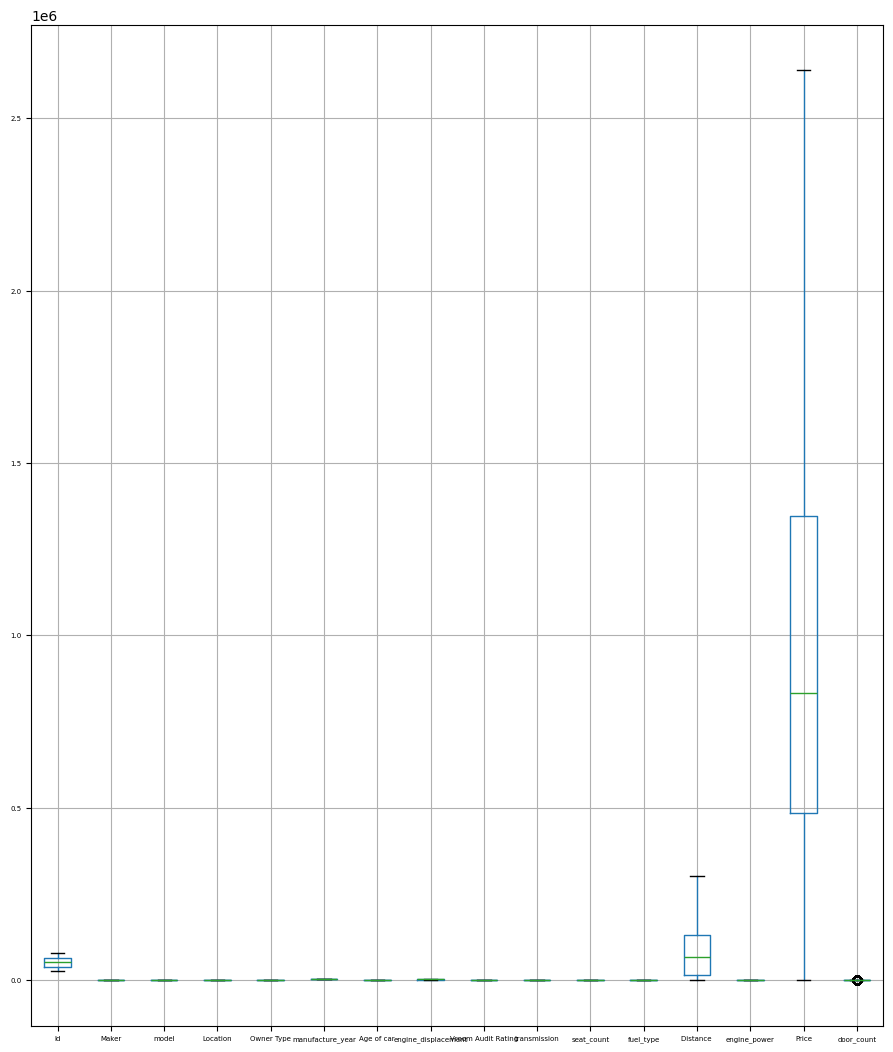

In [46]:
df_num.boxplot(fontsize=5,figsize=(11,13))
plt.show()

In [47]:
df3_Price=df_num[['Price']]

In [48]:
df_num.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
Owner Type                0
manufacture_year       1325
Age of car             1325
engine_displacement    5651
Vroom Audit Rating        0
transmission              0
seat_count             1581
fuel_type                 0
Distance                660
engine_power           5223
Price                  2961
door_count                0
dtype: int64

In [49]:
df_num.dropna(subset=['Distance ','manufacture_year','Age of car','engine_displacement','engine_power','seat_count','Price'],inplace=True)

In [50]:
#del df_num['door_count']

In [51]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [52]:
df2=df_num.copy()

In [53]:
df_stand=pd.DataFrame(ss.fit_transform(df_num),columns=df_num.columns)

In [54]:
df_num.isnull().sum()

Id                     0
Maker                  0
model                  0
Location               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
Vroom Audit Rating     0
transmission           0
seat_count             0
fuel_type              0
Distance               0
engine_power           0
Price                  0
door_count             0
dtype: int64

In [55]:
df_stand

,Id,Maker,model,Location,Owner Type,manufacture_year,Age of car,engine_displacement,Vroom Audit Rating,transmission,seat_count,fuel_type,Distance,engine_power,Price,door_count
0,-1.731615,-1.290723,-0.278837,-1.585253,1.341852,0.291171,-0.291171,-1.094378,0.002991,0.544221,-1.757089,0.982428,-0.686575,-1.385851,-0.949352,-0.063555
1,-1.731551,-1.739433,1.176808,-0.003942,1.341852,0.802013,-0.802013,1.014145,0.707230,-1.837488,0.568129,-1.017886,-0.428569,0.610809,2.603209,-0.063555
2,-1.731486,0.055408,-0.764052,1.261108,1.341852,0.035749,-0.035749,-0.041516,0.707230,0.544221,0.568129,0.982428,-0.457565,1.904940,0.044110,-0.063555
3,-1.731356,0.504118,-0.440575,-0.952729,-1.340737,1.057435,-1.057435,0.938541,-1.405487,0.544221,0.568129,-1.017886,-0.909025,0.795685,1.088130,-0.063555
4,-1.731292,0.504118,0.853332,-0.636466,-0.446541,-0.475093,0.475093,0.938541,0.002991,-1.837488,0.568129,-1.017886,1.479964,1.350313,-0.031937,1.529038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43321,1.733251,0.504118,-0.440575,-0.952729,-0.446541,-0.985936,0.985936,1.028146,1.411468,0.544221,0.568129,-1.017886,2.635545,0.536859,-1.052180,1.529038
43322,1.733316,0.952828,1.662023,-0.952729,1.341852,1.057435,-1.057435,-1.777617,-1.405487,0.544221,-1.757089,0.982428,-1.078884,-1.422826,-0.444921,-0.063555
43323,1.733380,0.504118,-0.440575,-0.320204,-0.446541,0.802013,-0.802013,-0.097519,-1.405487,0.544221,0.568129,-1.017886,-0.664181,-0.424496,0.729969,-0.063555
43324,1.733445,0.504118,-0.440575,-1.268991,-0.446541,-0.475093,0.475093,0.748130,1.411468,0.544221,0.568129,-1.017886,2.082650,-0.424496,-0.755021,1.529038


In [56]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [57]:
X=df_stand[['Id','Maker','model','Location','Distance ','Owner Type','manufacture_year','door_count','Age of car','engine_displacement','engine_power','Vroom Audit Rating','transmission','seat_count','fuel_type']]
y=df_stand['Price']

In [58]:
model.fit(X,y)

LinearRegression()

In [59]:
model.score(X,y)

0.8280645110862339

In [56]:
y_predicted=pd.DataFrame(model.predict(X),columns=['Y_predicted'])

In [57]:
y_predicted

,Y_predicted
0,-0.273243
1,1.539894
2,0.448943
3,0.961033
4,0.149513
...,...
43645,-0.969631
43646,-0.289723
43647,0.323582
43648,-0.917873


In [58]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_predicted)

np.float64(0.17992809649121438)

In [59]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,y_predicted)

np.float64(0.32322773553560624)